# Amazon Fine Food Sentimental Analysis

In this sentiment analysis project, I aim to analyze the emotional tone in a corpus of customer feedback for Fine Food sold at Amazon. The goal of this project is to identify the sentiment polarity (positive, negative, or neutral) of each feedback entry and to provide actionable insights to the company based on the analysis results. To achieve this goal, I will collect and preprocess a dataset of customer feedback, build and train a sentiment analysis model using machine learning techniques, and evaluate the model's performance. The insights generated from this project will help the company improve their customer experience and ultimately enhance their brand reputation.

Throughout this project, I will take you through my approach to data science and natural language processing, including data cleaning, exploratory data analysis, feature engineering, model selection, and evaluation. I will also share my findings, insights, and recommendations based on the analysis. I will use various tools and technologies, such as Python, SQL, and visualization libraries to facilitate this process, this phases will be introducted as Machine Learning workflow and goals.

Overall, the purpose of this notebook is to guide through a typical checklist for an end-to-end data science project and demonstrate my thought process while solving a problem, in this case I am going to be working with a real life problem from Amazon.

My goal with this project it's to implement a Machine Learning model and solve the problem the most efficient way posible, taking into account the cost of deployment and performance of the trained model. For this, I am not looking for a perfect score but rather looking a sustainable model, replicable and cost efficient solution for Amazon.

I hope that this project will provide a valuable learning experience for anyone interested in data science, and that it will demonstrate the power of data analysis in driving meaningful outcomes.

-----
# Machine Learning Workflow

If you are following my projects you already know that I like to implement a workflow to keep everything organized, having a simple approach and dividing each step into phases. With this I can have a clear goal to approach and reach.

As usual, in my particular case the Machine Learning Workflow will have 7 sections:

1. Question or problem definition.

2. Acquire training and testing data.

3. Wrangle, prepare, cleanse the data.

4. Analyze, identify patterns, and explore the data.

5. Model, predict and solve the problem.

6. Visualize, report, and present the problem solving steps and final solution.

7. Supply or submit the results.

It is important to say that having a clear mindset through the entire notebook may implied combining multiple workflow stages, perform a stage earlier than indicated or perfom a stage multiple times in our workflow.

This would not change the main goal of the project or the approach we are trying to implement.

---
# Workflow goals

As a data scientist I will use every tool available to provide a solution for seven major goals in my workflow:

**1. Classifying:** I may want to classify or categorize our samples. I may also want to understand the implications or correlation of different classes with our solution goal.

**2. Correlating:** The problem need to be solved based on available features within the training dataset, so it is importan to ask: Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset.

**3. Converting:** Depending on the choice of model algorithm I may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**4. Complementing:** Data preparation may also require me to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**5. Correcting:** I may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors (Outliers).

**6. Creating:** I could create new features based on an existing feature or a set of features if I need to, such that the new feature follows the correlation, conversion and completeness goals.

**7. Charting:** Select the right visualization plots and charts depending on nature of the data and the solutions goals.

----
# Question or problem definition.

## Problem description

In today's world, online reviews and feedback are vital for businesses to understand their customers' sentiments towards their products and services. Analyzing these sentiments can help businesses make informed decisions, such as improving their products and services, enhancing customer experience, and targeting specific customer segments.

## Project objective

The goal of this sentiment analysis project is to develop a machine learning model that can accurately identify and classify the sentiment of customer reviews. The model will be trained on a dataset of customer reviews, which will be labeled as either positive, negative, or neutral.

The dataset consist of of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews. Reviews include product and user information, ratings, and a plaintext review. There is also reviews from all other Amazon categories.

The model will need to be able to accurately analyze the text of the review and classify it as either positive, negative, or neutral.

The project will involve several key steps, including data preprocessing, feature extraction, model selection, and evaluation. The data preprocessing step will involve cleaning and transforming the raw data to make it suitable for analysis. The feature extraction step will involve selecting and extracting the relevant features from the preprocessed data. The model selection step will involve selecting an appropriate machine learning algorithm to train the sentiment analysis model. Finally, the evaluation step will involve testing the model's performance on a separate dataset to determine its accuracy and effectiveness.

Overall, the success of this sentiment analysis project will depend on the accuracy of the machine learning model and its ability to correctly identify and classify customer sentiment in real-world scenarios.

# Acquire training and testing data

## Load libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
init_notebook_mode(connected=True)
sns.set_style('whitegrid')
%matplotlib inline

## Load data

In [2]:
data = pd.read_csv('D:\Data\Reviews.csv.zip')

# Wrangle, prepare, cleanse the data

## Understanding data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


## Understanding data dictionary

**Id:** Row Id

**ProductId:** Unique identifier for the product

**UserId:** Unqiue identifier for the user

**ProfileName:** Profile name of the user            

**HelpfulnessNumerator:** Number of users who found the review helpful     

**HelpfulnessDenominator:** Number of users who indicated whether they found the review helpful or not   

**Score:** Rating between 1 and 5                    

**Time:** Timestamp for the review                    

**Summary:** Brief summary of the review                 

**Text:** Text of the review 

## Understanding data structure

In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


There is many identifiers (Id) so I might wanna look at individual reviews for particular products and users, there is two indicators, one telling us the number of users that found the review useless and the other one telling us wether they found the review helpful or not (So HelpfulnessDenominator - HelpfulnessNumerator = Number of people that found the review not helpful, I would to engineer that).

Score is just a usual 5 star product review and then we got the Summary and Text of the review posted by the user. 

## Data Cleanse

In this section I want to clean and engineer some feature out of the data:

- Create a new column like mentioned befored, telling me the amount of people that found a review NOT helpful.
- Create a new column with length of the Summary.
- Create a new column with length of the Text.

Lets engineer these features!

### Creating Not helpful column

I will also rename the original column and drop the one containing all of the reviews.

In [5]:
data['Found_Not_Helpful'] = data['HelpfulnessDenominator'] - data['HelpfulnessNumerator']

data.rename(columns = {"HelpfulnessNumerator": "Found_Helpful"}, inplace = True)

data.drop('HelpfulnessDenominator', axis = 1 , inplace = True)

### Creating length columns

Before creating these columns I need to make sure my data does not have any missing values, lets check that.

In [6]:
pd.DataFrame({'Missing Values' : data.isna().sum()}).sort_values(by = 'Missing Values', 
                                                                 ascending = False)[:2]

,Missing Values
Summary,27
ProfileName,16


There is some text revies without a Summary Title and some missing ProfileName, Since I am not gonna be using the name for nothing I can fill that out both with "None".

In [7]:
data = data.fillna(value = 'None')

Missing Values filled! Lets create the length columns.

In [8]:
data['Summary_Length'] = data['Summary'].apply(len)
data['Text_Length'] = data['Text'].apply(len)

## Re-organized

Lets re-organized the data in order to have a clean analysis and thought process.

In [9]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'Found_Helpful', 'Score',
       'Time', 'Summary', 'Text', 'Found_Not_Helpful', 'Summary_Length',
       'Text_Length'],
      dtype='object')

In [10]:
cols = ['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'Found_Helpful', 'Found_Not_Helpful', 
        'Score', 'Summary', 'Summary_Length', 'Text', 'Text_Length']

data = data[cols]

# Analyze, identify patterns, and explore the data.

## Score

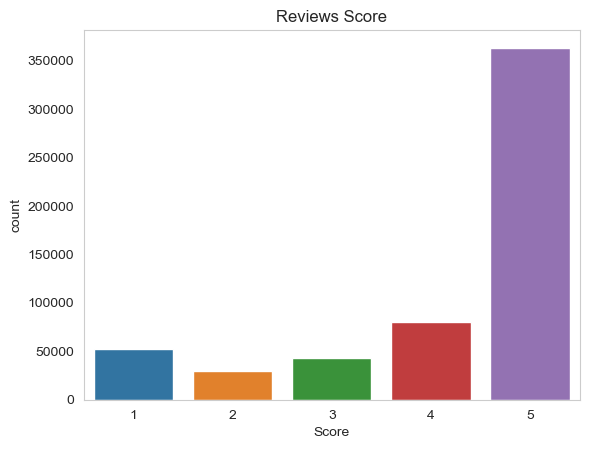

In [11]:
sns.countplot(data['Score'])
plt.title('Reviews Score')
plt.grid(False);

In the dataset we mostly have 5 star reviews, so detecting the reasons why people reviews with 1s and 2s must be analysed.

## Helpful & Not Helpful

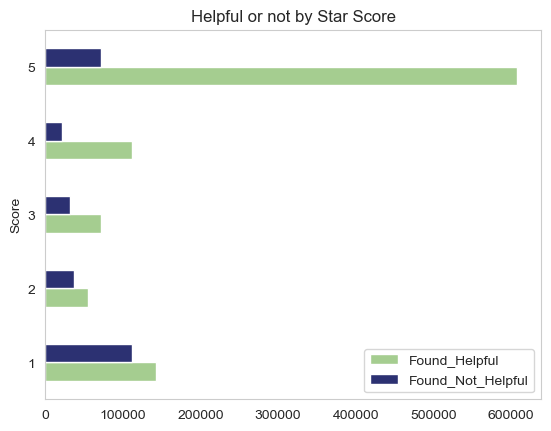

In [12]:
data.groupby('Score').sum()[['Found_Helpful', 'Found_Not_Helpful']].plot(kind = 'barh', cmap = 'crest')

plt.grid(False)
plt.title('Helpful or not by Star Score');

It looks like users usually agree with the review made by the buyer, being 1 Star the one with more people disagreeing with the buyer.

## Length by Score 

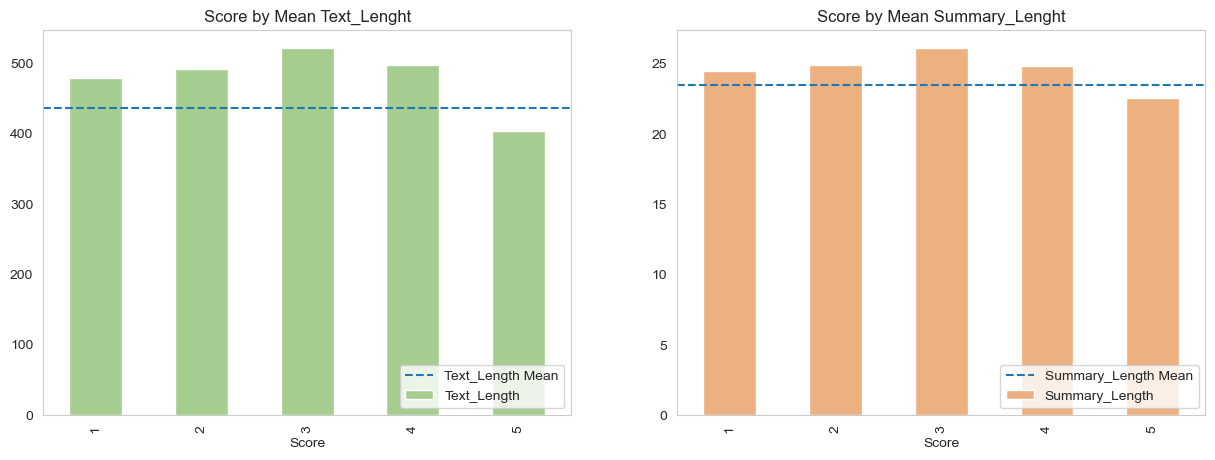

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

data.groupby('Score').mean()['Text_Length'].plot(kind = 'bar', cmap = 'crest' , ax = ax1)
ax1.grid(False)
ax1.axhline(data['Text_Length'].mean(), linestyle = '--', label = 'Text_Length Mean')
ax1.legend(loc = 'lower right')
ax1.set_title('Score by Mean Text_Lenght')


data.groupby('Score').mean()['Summary_Length'].plot(kind = 'bar', cmap = 'flare' , ax = ax2)
ax2.grid(False)
ax2.axhline(data['Summary_Length'].mean(), linestyle = '--', label = 'Summary_Length Mean')
ax2.legend(loc = 'lower right')
ax2.set_title('Score by Mean Summary_Lenght');

5 Star reviews length usually is smaller than the others, the higher length is found in the 3 star score which is interesting because there were the ones with less observations in the data.

# Model, predict and solve the problem

## Basic NLTK

Lets get a random example from the data in order to do some test before I applied models to the entire 500.000 rows sample.

In [14]:
TextChoice = np.random.choice(list(range(0, len(data))), size = (1))
SummaryChoice = np.random.choice(list(range(0, len(data))), size = (1))


TextSample = data['Text'][TextChoice].values[0]
SummarySample = data['Summary'][SummaryChoice].values[0]

In [15]:
print(TextSample)

My sister and I both really like these and we have purchased several cases so far.  The individual packs make it easy to take them along for lunch or put them in a purse for a snack on the road.


In [16]:
print(SummarySample)

Authentic, tasty and fresh


### Sentiment Intensity Analyzer Trial

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iliam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

Lets test the SIA in our Examples!

In [19]:
print(TextSample)
print(' ')
print(sia.polarity_scores(TextSample))

My sister and I both really like these and we have purchased several cases so far.  The individual packs make it easy to take them along for lunch or put them in a purse for a snack on the road.
 
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.6901}


In [20]:
print(SummarySample)
print(' ')
print(sia.polarity_scores(SummarySample))

Authentic, tasty and fresh
 
{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}


It looks like is working just fine, I do agree with the predictions made by the SIA. I would love to get a list and classify with my opinion and see what would be the SIA score. Lets do that!

For that I will take the first 5 reviews of the sample.

In [21]:
Top5 = data[['Score','Summary', 'Text']].head(5)

In [22]:
for index, item in enumerate(Top5['Summary']):
    
    print(index, item, end = ' | ')

0 Good Quality Dog Food | 1 Not as Advertised | 2 "Delight" says it all | 3 Cough Medicine | 4 Great taffy | 

In [23]:
SummaryOpinion = ['Positive', 'Negative', 'Positive', 'Neutral' , 'Positive']

In [24]:
for index, item in enumerate(Top5['Text']):
    
    print(index, item)
    print(' ')

0 I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
 
1 Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
 
2 This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.
 
3 If you are looking fo

In [25]:
TextOpinion = ['Positive', 'Negative', 'Positive', 'Positive', 'Positive']

Opinion done! Lets test the SIA

In [26]:
Top5['neg'], Top5['neu'], Top5['pos'], Top5['compound']  = ['-'] * 5, ['-'] * 5, ['-'] * 5, ['-'] * 5

for index, summary in enumerate(Top5['Summary']):
    
    for key, value in sia.polarity_scores(summary).items():
        
        Top5.at[index, key] = value
        
Top5.rename(columns = {'neg' : 'Summary Negative', 'neu' : 'Summary Neutro', 'pos' : 'Summary Positive'}, inplace = True)
Top5.drop('compound', axis = 1, inplace = True)

In [27]:
Top5['neg'], Top5['neu'], Top5['pos'], Top5['compound']  = ['-'] * 5, ['-'] * 5, ['-'] * 5, ['-'] * 5

for index, Text in enumerate(Top5['Text']):
    
    for key, value in sia.polarity_scores(Text).items():
        
        Top5.at[index, key] = value
        
Top5.rename(columns = {'neg' : 'Text Negative', 'neu' : 'Text Neutro', 'pos' : 'Text Positive'}, inplace = True)
Top5.drop('compound', axis = 1, inplace = True)

In [28]:
Top5['Summary Opinion'] = SummaryOpinion
Top5['Text Opinion'] = TextOpinion

In [29]:
Top5.columns

Index(['Score', 'Summary', 'Text', 'Summary Negative', 'Summary Neutro',
       'Summary Positive', 'Text Negative', 'Text Neutro', 'Text Positive',
       'Summary Opinion', 'Text Opinion'],
      dtype='object')

In [30]:
cols = ['Score', 'Summary', 'Summary Opinion', 'Summary Negative', 'Summary Neutro',
       'Summary Positive', 'Text', 'Text Opinion', 'Text Negative', 'Text Neutro', 'Text Positive']

Top5 = Top5[cols]

Top5

,Score,Summary,Summary Opinion,Summary Negative,Summary Neutro,Summary Positive,Text,Text Opinion,Text Negative,Text Neutro,Text Positive
0,5,Good Quality Dog Food,Positive,0.0,0.508,0.492,I have bought several of the Vitality canned d...,Positive,0.0,0.695,0.305
1,1,Not as Advertised,Negative,0.0,1.0,0.0,Product arrived labeled as Jumbo Salted Peanut...,Negative,0.138,0.862,0.0
2,4,"""Delight"" says it all",Positive,0.0,1.0,0.0,This is a confection that has been around a fe...,Positive,0.091,0.754,0.155
3,2,Cough Medicine,Neutral,0.0,1.0,0.0,If you are looking for the secret ingredient i...,Positive,0.0,1.0,0.0
4,5,Great taffy,Positive,0.0,0.196,0.804,Great taffy at a great price. There was a wid...,Positive,0.0,0.552,0.448


It looks like SIA does not agree that much with my opinion, lets run SIA in the entire data set and plot the results to see if they match the score.

### Sentiment Intensity Analyzer

In [31]:
from tqdm.notebook import tqdm

In [32]:
result = dict()

for index, row in tqdm(data.iterrows(), total = len(data)):
    text = row['Text']
    Id = row['Id']
    result[Id] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [33]:
SIADF = pd.DataFrame(result).transpose()
SIADF = SIADF.reset_index().rename(columns = {'index': 'Id'})
SIADF = SIADF.merge(data, how = 'left')

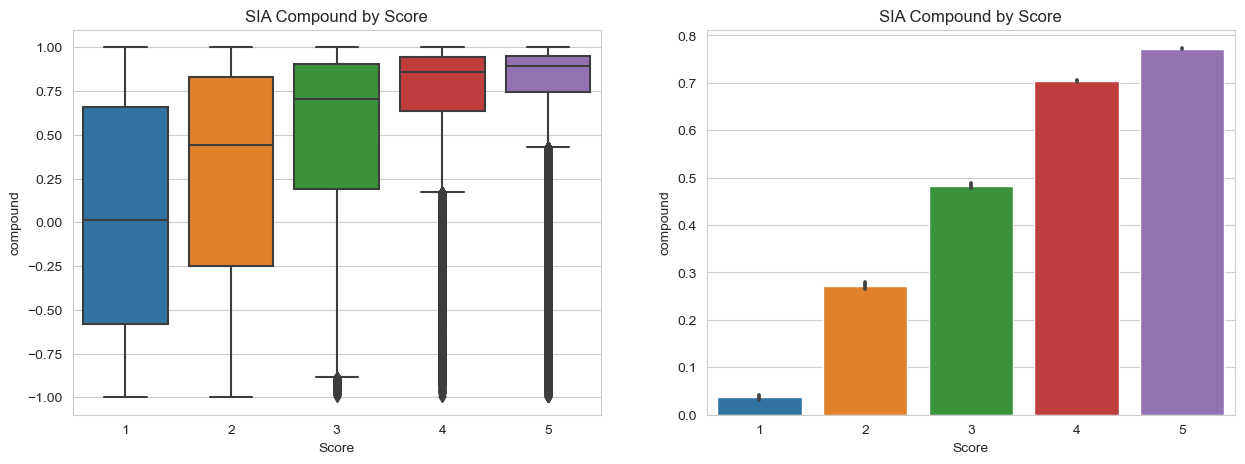

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 5))
sns.boxplot(data = SIADF, x = 'Score', y = 'compound', ax = ax1)
ax1.set_title('SIA Compound by Score')

sns.barplot(data = SIADF, x = 'Score', y = 'compound', ax = ax2)
ax2.set_title('SIA Compound by Score');

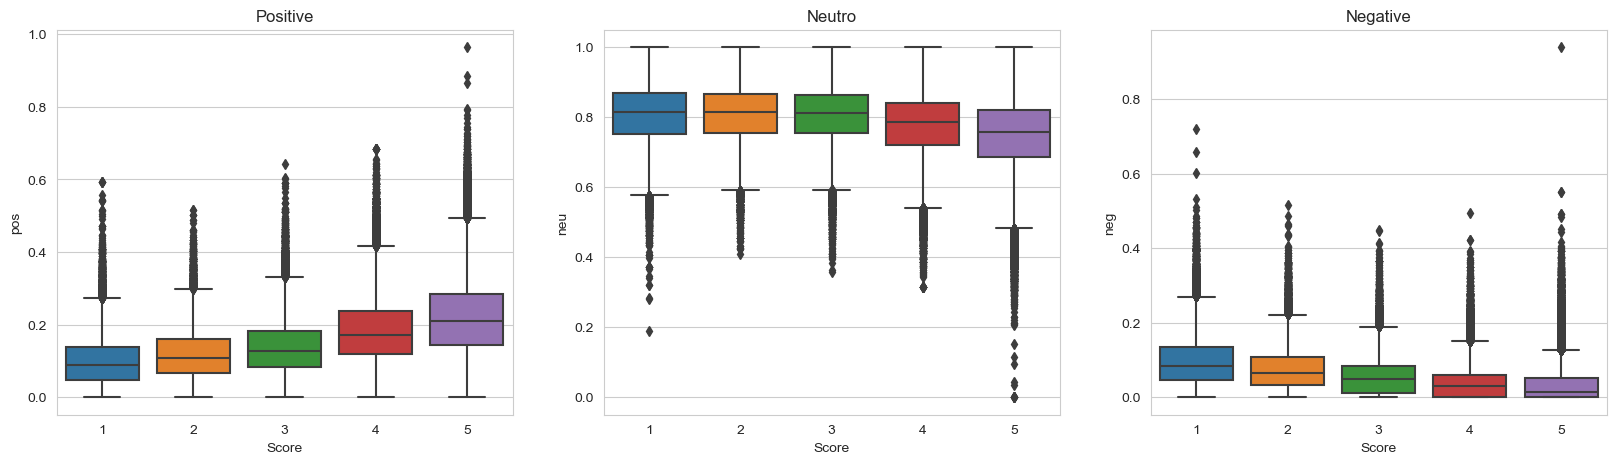

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))

sns.boxplot(data = SIADF, x = 'Score', y = 'pos', ax = ax1)
ax1.set_title('Positive')

sns.boxplot(data = SIADF, x = 'Score', y = 'neu', ax = ax2)
ax2.set_title('Neutro')


sns.boxplot(data = SIADF, x = 'Score', y = 'neg', ax = ax3)
ax3.set_title('Negative');

I believe SIA results are pretty decent, but I dont think it really describes the data hand to hand with the score given by the user, I would love to explore more options before I take a decision in what model to use.

## RoBERTa

RoBERTa stands for Robustly Optimized BERT-Pretraining Approach, In many ways this is a better version of the BERT model.

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

There are many pre-trained RoBERTa models, you can check them all in their [website](https://huggingface.co/models?other=roberta). For this case I will use the [Twitter RoBERTa Base Sentiment](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment).

In [37]:
tokenizer = AutoTokenizer.from_pretrained(f"cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained(f"cardiffnlp/twitter-roberta-base-sentiment")

Lets run RoBERTa in our sample text

In [38]:
Sample = model(**tokenizer(TextSample, return_tensors = 'pt'))
RobertScore = softmax(Sample[0][0].detach().numpy())

RobertaScore = {'neg': RobertScore[0], 'neu': RobertScore[1], 'pos': RobertScore[2]}

RobertaScore

{'neg': 0.0009857186, 'neu': 0.020901639, 'pos': 0.97811264}

In [39]:
TextSample

'My sister and I both really like these and we have purchased several cases so far.  The individual packs make it easy to take them along for lunch or put them in a purse for a snack on the road.'

Lets run it now in the entire dataset, for that I will need to create a function. I will also add SIA results to compare.

In [40]:
TrainSample = data.sample(n = 5000, random_state = 42)

In [41]:
TrainSample.shape

(5000, 12)

In [42]:
def RobertaScore(text):
    
    Sample = model(**tokenizer(text, return_tensors = 'pt'))
    Score = softmax(Sample[0][0].detach().numpy())
    
    return {'RoBERTa negative': Score[0], 'RoBERTa neutral': Score[1], 'RoBERTa positive': Score[2]}

In [43]:
results, DeleteIndex = dict(), list()

for index, row in tqdm(TrainSample.iterrows(), total = len(TrainSample)):
    
    try:
    
        text = row['Text']
        Id = row['Id']

        SIAResult = sia.polarity_scores(text)
        SIAResultRenamed = {}

        for key, value in SIAResult.items():

            SIAResultRenamed[f"SIA_{key}"] = value

        results[Id] = {**SIAResultRenamed, **RobertaScore(text)}
        
    except RuntimeError:
        print(f'Drop ID: {Id}', end = ', ')

  0%|          | 0/5000 [00:00<?, ?it/s]

Drop ID: 184619, Drop ID: 31994, Drop ID: 171315, Drop ID: 149020, Drop ID: 366169, Drop ID: 159236, Drop ID: 282917, Drop ID: 224275, Drop ID: 157118, Drop ID: 280809, Drop ID: 52278, Drop ID: 205204, Drop ID: 14042, Drop ID: 175497, Drop ID: 57164, Drop ID: 88051, Drop ID: 126740, Drop ID: 278863, Drop ID: 409806, Drop ID: 182582, Drop ID: 330358, Drop ID: 242726, Drop ID: 193649, Drop ID: 165555, Drop ID: 270552, Drop ID: 550372, Drop ID: 497902, Drop ID: 4307, Drop ID: 466145, Drop ID: 139315, Drop ID: 492330, Drop ID: 146856, Drop ID: 410247, Drop ID: 105975, Drop ID: 58898, Drop ID: 347875, Drop ID: 468231, Drop ID: 381509, Drop ID: 58037, Drop ID: 243163, Drop ID: 245896, Drop ID: 354404, Drop ID: 523940, Drop ID: 403318, Drop ID: 44498, 

In [44]:
ROBERTA_SIA_DF = pd.DataFrame(results).transpose()
ROBERTA_SIA_DF = ROBERTA_SIA_DF.reset_index().rename(columns = {'index': 'Id'})
ROBERTA_SIA_DF = ROBERTA_SIA_DF.merge(TrainSample, how = 'left')

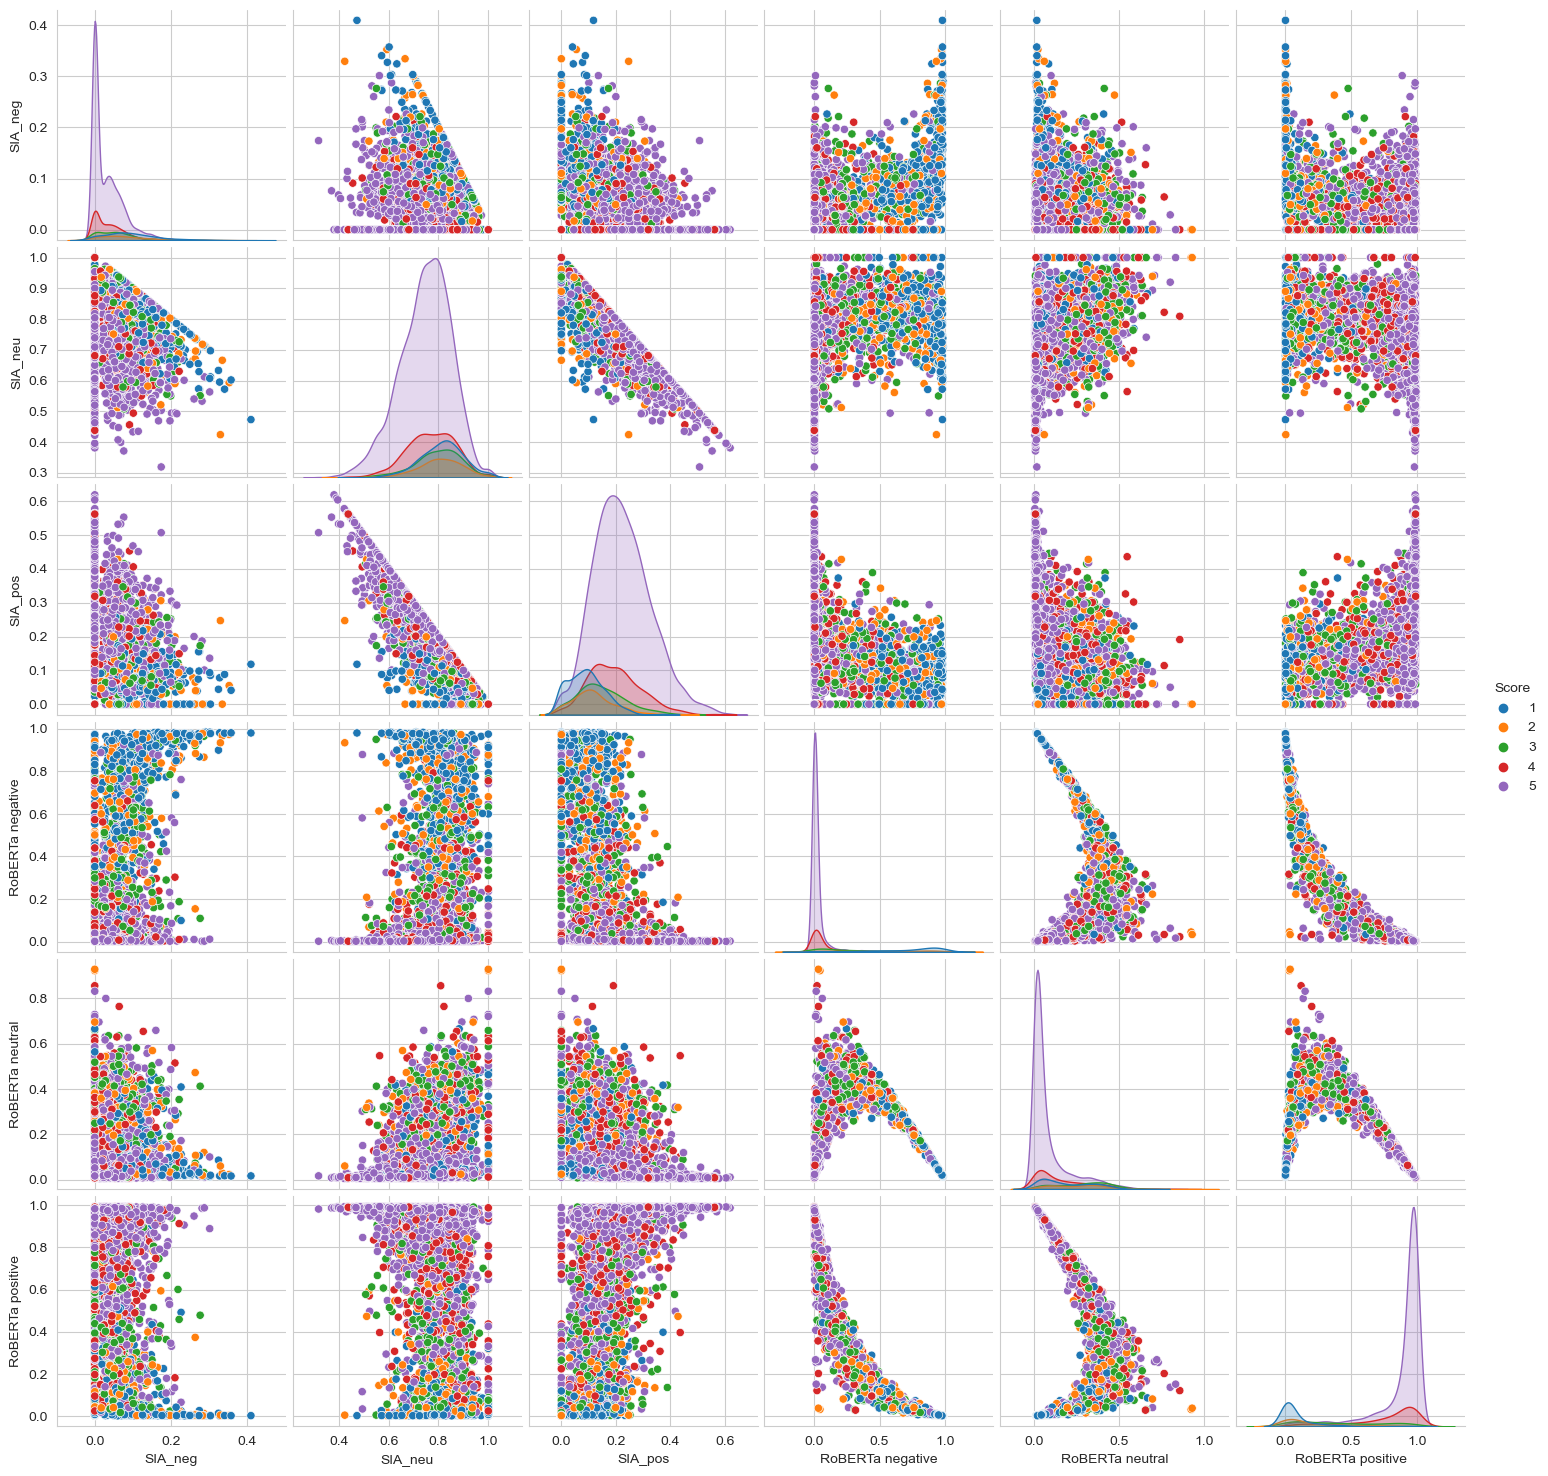

In [45]:
sns.pairplot(data = ROBERTA_SIA_DF,
             vars = ['SIA_neg', 'SIA_neu', 'SIA_pos',
                   'RoBERTa negative', 'RoBERTa neutral', 'RoBERTa positive'],
            hue = 'Score',
            palette = 'tab10')
plt.show()

Lets look at some examples where the model predicted positive sentiment but it was actually a 1 star review.


#### RoBERTa

In [46]:
ROBERTA_SIA_DF[ROBERTA_SIA_DF['Score'] == 1].sort_values(by = 'RoBERTa positive', ascending = False)['Text'].values[0]

'As I stated above, this is a great product for cats.  My four cats, some old some young, love it.  Especially my 5 years old male tabby.<br /><br />And, the store shipping the product is really fast.  Thank you...my cats George and Gracie thank you.<br />Carol Sheats'

#### SIA

In [47]:
ROBERTA_SIA_DF[ROBERTA_SIA_DF['Score'] == 1].sort_values(by = 'SIA_pos', ascending = False)['Text'].values[0]

'UPDATE: BUT 5 stars GO TO AMAZON WHO ISSUED A CREDIT FOR MY LAST ORDER OF THIS PRODUCT! GOOD WORK AND THANK YOU AMAZON, I AM IMPRESSED!!! -Mo<br />..........................................<br /><br />(change from 5 stars to 1) CANCEL THIS PRAISE OF THIS PRODUCT! It DOES contain BPA! -Mo<br />..........................................<br /><br />This is *great* fish; no BPA, no added salt (*I* choose what and if salt is added), I LOVE lots of eatable fish bones (top calcium availability), congratulations Crown Prince and thank you for canning fish I can eat without BPA!'

Now lets look at those samples where the model predicted negative sentiment but it was actually a 5 star review

#### RoBERTa

In [48]:
ROBERTA_SIA_DF[ROBERTA_SIA_DF['Score'] == 5].sort_values(by = 'RoBERTa negative', ascending = False)['Text'].values[0]

'These are the same product as the Bite-Size in the smaller blue bag except that they\'re longer links and vary in length.<br /><br />The ingredient list is somewhat gross as it lists specific parts of the pig.  If you can get past that, the taste is unmatched!<br /><br />The Slim-Jim ingredient list was similarly disturbing to me as Slim-Jim has, as separate ingredients "chicken" and "mechanically-separated chicken."  I don\'t understand why one or the other doesn\'t cover both.'

#### SIA

In [49]:
ROBERTA_SIA_DF[ROBERTA_SIA_DF['Score'] == 5].sort_values(by = 'SIA_neg', ascending = False)['Text'].values[0]

'Great price.  Fast shipping.  Be aware of this alternative to sugar.  Plant based, no calories, no carbs, no artificial ingredients, no chemicals!'

# Visualize, report, and present the problem solving steps and final solution.

## Times predicted wrong, right or stayed neutral

In [50]:
ROBERTA_SIA_DF[['SIA_neg_rounded', 'SIA_neu_rounded', 'SIA_pos_rounded']] = round(ROBERTA_SIA_DF[['SIA_neg', 'SIA_neu', 'SIA_pos']])
ROBERTA_SIA_DF[['RoBERTa_negative_rounded', 'RoBERTa_neutral_rounded', 'RoBERTa_rounded_positive']] = round(ROBERTA_SIA_DF[['RoBERTa negative', 'RoBERTa neutral', 'RoBERTa positive']])

In [51]:
# Times SIA predicted negative when it was 5

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 5) & (ROBERTA_SIA_DF['SIA_neg_rounded'] == 1.0)].count()[0]

0

In [52]:
# Times RoBERTa predicted negative when it was 5

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 5) & (ROBERTA_SIA_DF['RoBERTa_negative_rounded'] == 1.0)].count()[0]

46

In [53]:
NegativeWhen5 = [0, 46]

In [54]:
# Times SIA predicted positive when it was 1

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 1) & (ROBERTA_SIA_DF['SIA_pos_rounded'] == 1.0)].count()[0]

0

In [55]:
# Times RoBERTa predicted positive when it was 1

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 1) & (ROBERTA_SIA_DF['RoBERTa_rounded_positive'] == 1.0)].count()[0]

22

In [56]:
PositiveWhen1 = [0, 22]

In [57]:
# Times SIA stayed neutral when it was 5

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 5) & (ROBERTA_SIA_DF['SIA_neu_rounded'] == 1.0)].count()[0]

3134

In [58]:
# Times RoBERTa stayed neutral when it was 5

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 5) & (ROBERTA_SIA_DF['RoBERTa_neutral_rounded'] == 1.0)].count()[0]

41

In [59]:
NeutralWhen5 = [3134, 41]

In [60]:
# Times SIA stayed neutral when it was 1

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 1) & (ROBERTA_SIA_DF['SIA_neu_rounded'] == 1.0)].count()[0]

447

In [61]:
# Times RoBERTa stayed neutral when it was 1

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 1) & (ROBERTA_SIA_DF['RoBERTa_neutral_rounded'] == 1.0)].count()[0]

5

In [62]:
NeutraolWhen1 = [447, 5]

In [63]:
# Times SIA predicted positive when it was 5

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 5) & (ROBERTA_SIA_DF['SIA_pos_rounded'] == 1.0)].count()[0]

40

In [64]:
# Times RoBERTa predicted positive when it was 5

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 5) & (ROBERTA_SIA_DF['RoBERTa_rounded_positive'] == 1.0)].count()[0]

2980

In [65]:
PositiveWhen5 = [40, 2980]

In [66]:
# Times SIA predicted negative when it was 1

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 1) & (ROBERTA_SIA_DF['SIA_neg_rounded'] == 1.0)].count()[0]

0

In [67]:
# Times RoBERTa predicted negative when it was 1

ROBERTA_SIA_DF[(ROBERTA_SIA_DF['Score'] == 1) & (ROBERTA_SIA_DF['RoBERTa_negative_rounded'] == 1.0)].count()[0]

344

In [68]:
NegativeWhen1 = [0, 344]

In [69]:
# Total 1s and 5s

ROBERTA_SIA_DF[ROBERTA_SIA_DF['Score'] == 1].count()[0]

448

In [70]:
ROBERTA_SIA_DF[ROBERTA_SIA_DF['Score'] == 5].count()[0]

3192

In [71]:
OnesAndFives = [448, 3192]

## Performance Summary

In [72]:
Summary = pd.DataFrame(index = ['SIA', 'RoBERTa'])
Summary['Wrong 5'] = NegativeWhen5
Summary['Wrong 1']= PositiveWhen1
Summary['Neutral 5'] = NeutralWhen5
Summary['Neutral 1'] = NeutraolWhen1
Summary['Right 5'] = PositiveWhen5
Summary['Right 1'] = NegativeWhen1
Summary['Total 1s & 5s'] = OnesAndFives

Summary

,Wrong 5,Wrong 1,Neutral 5,Neutral 1,Right 5,Right 1,Total 1s & 5s
SIA,0,0,3134,447,40,0,448
RoBERTa,46,22,41,5,2980,344,3192


When we look at the statistics we can clearly see that RoBERTa won by much! SIA make a lot of neutral predictions which is really not that good. I rather have few mistakes like had (68 mistakes out of 3640 observations), so the model I am gonna use is RoBERTa.

# Supply or submit the results

## Transformers Pipline

In [73]:
from transformers import pipeline

PipeReturn = pipeline("sentiment-analysis",
                      model = AutoModelForSequenceClassification.from_pretrained(f"cardiffnlp/twitter-roberta-base-sentiment"),
                      tokenizer = AutoTokenizer.from_pretrained(f"cardiffnlp/twitter-roberta-base-sentiment"))

In [74]:
PipeReturn("I hate it")

[{'label': 'LABEL_0', 'score': 0.9556285738945007}]

In [75]:
PipeReturn("I love it")

[{'label': 'LABEL_2', 'score': 0.9655040502548218}]

In [76]:
PipeReturn("I dont know")

[{'label': 'LABEL_1', 'score': 0.5626626014709473}]

## User input / output

lets create a function to recieve an input and show an output.

In [77]:
def get_sentiment(text: str):
    
    try: 

        sentiment = PipeReturn(text)[0]

        for key, value in sentiment.items():

            if sentiment[key] == 'LABEL_0':

                return 'Negative'

            elif sentiment[key] == 'LABEL_2':  

                return 'Positive'

        return 'Neutro'
    
    except RuntimeError:
        
        return "Unclassified"

In [78]:
get_sentiment('I dont know')

'Neutro'

In [79]:
get_sentiment('Is really enjoyable')

'Positive'

In [80]:
get_sentiment('It sucked!')

'Negative'

## Test Model in positive / negative reviews

Lets build a 500 sample of only (2,3) and (4,5), run the model and plot to see if works and how well it performed.

In [81]:
FinalSample = data[(data['Score'] < 3) | (data['Score'] > 3)].sample(500)

In [82]:
FinalSample['Sentiment'] = FinalSample['Text'].apply(get_sentiment)

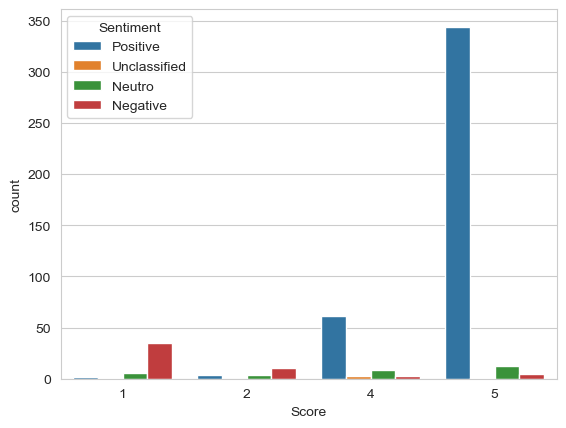

In [83]:
sns.countplot(data = FinalSample, x = 'Score', hue = 'Sentiment');

It looks like it manages to detect 2 / 1 as mostly negative and 4 / 5 as mostly positive, thats what the performance I wanted.  

In [84]:
pd.DataFrame(FinalSample['Score'].value_counts()).T

,5,4,1,2
Score,362,76,44,18


In [85]:
pd.DataFrame(FinalSample.groupby('Sentiment').agg(['median', 'mean'])['Score']).T

Sentiment,Negative,Neutro,Positive,Unclassified
median,1.000000,4.000000,5.00000,4.0
mean,1.735849,3.548387,4.80292,3.6


Lets see how much % of the sample the model couldnt classify

In [86]:
pd.DataFrame(FinalSample['Sentiment'].value_counts()).T

,Positive,Negative,Neutro,Unclassified
Sentiment,411,53,31,5


In [87]:
5 / FinalSample.shape[0]

0.01

The model classify 99% of the sample, lets see how many errors the model have (An error being describe as 1 / 2 Star reviews predicted as Positive or 4 / 5 reviews predicted as Negative)

In [88]:
FinalSample[(FinalSample['Sentiment'] == 'Positive') & (FinalSample['Score'] < 3)].count()[0]

6

In [89]:
FinalSample[(FinalSample['Sentiment'] == 'Negative') & (FinalSample['Score'] > 3)].count()[0]

8

In [90]:
4 / FinalSample.shape[0], 13 / FinalSample.shape[0]

(0.008, 0.026)

The model predicted 0.008% 1 / 2 Star Reviews as Positive and 0.026% 4 / 5 Star reviews as Negative. Which is a pretty good performance for the model since they were always gonna be some outliers.

## Project Summary

### Did it solve the Amazon problem?

From the test we saw a pretty amazing performance of the pre-trained model, so that I can say safetly that I managed to solve the sentiment classification problem from the food reviews.  

### Project Final Thoughts

By analyzing the sentiment of customer reviews for a particular product or service, I have gained valuable insights into how customers feel about it. This information can be used to make data-driven decisions about how to improve the product or service and provide a better customer experience.

This project involved several important steps, including data preprocessing, choosing a suitable sentiment analysis method, training and evaluating the model, and interpreting the results. By following these steps, I was able to develop a robust sentiment analysis system that accurately predicts the sentiment of customer reviews.

It's important to note that sentiment analysis is a constantly evolving field, and there are always new methods and techniques being developed. As anyone reading this notebook continue to work on projects like this, be sure to stay up-to-date with the latest research and techniques, and continue to refine your skills.

Overall, this sentiment analysis project was a valuable learning experience, and it has provided me with the skills and knowledge to apply sentiment analysis techniques to a wide range of applications.